<a href="https://colab.research.google.com/github/noow33s/cos3302week2/blob/main/Data_analysis_week4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ref: website => https://www.linkedin.com/pulse/introduction-exploratory-data-analysis-kaushik-mani

### Required libraries

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Download dataset

In [7]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = ["age", "work-class", "fnlwgt", "education", "education-num","marital-status", "occupation", "relationship",
           "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"]
data = pd.read_csv(url, names=columns, sep=',', na_values='?', skipinitialspace =True)

### Exploring data

In [3]:
data.head()

,age,work-class,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


####Basic information

In [18]:
# Age Statistics
print("Age Statistics")
print(data['age'].describe())
print("Median Age: ", data['age'].median())

Age Statistics
count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64
Median Age:  37.0


#### Visualization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8fd89ac110>,
      dtype=object)

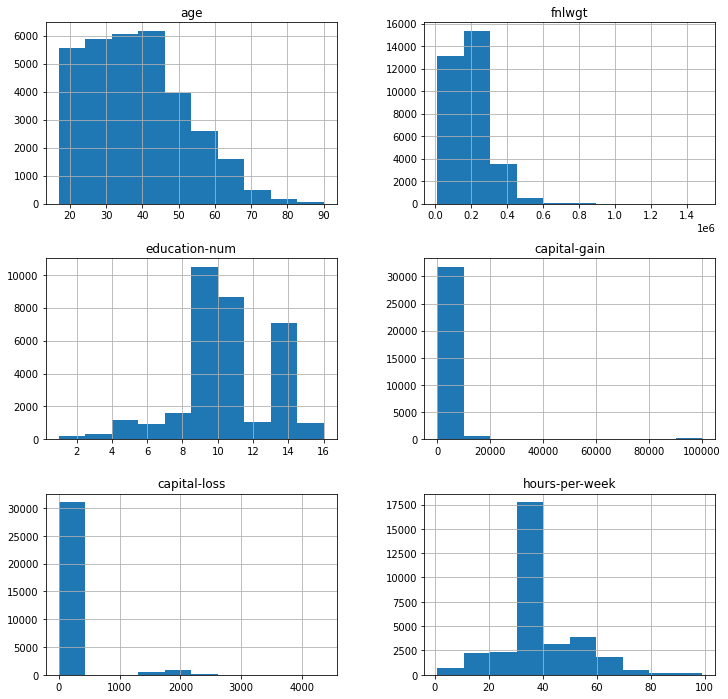

In [5]:
#Plot histogram for numerical values.
numerical_attributes = data.select_dtypes(include=['int'])
numerical_attributes.hist(figsize=(12,12))

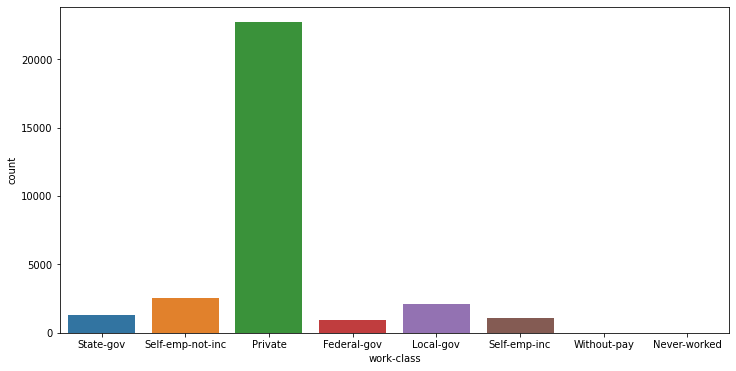

In [19]:
#Plot histogram for categorical values (workclass).
# Plotting count plot for categorical values
categorical_attributes = data.select_dtypes(include=['object'])
# Work-class Count plot
plt.figure(figsize=(12,6))
sns.countplot(data = categorical_attributes, x = "work-class")

#### Check missing information

In [7]:
data.info()
print("Missing value count occupation: ", data['occupation'].isnull().sum())
print("Missing value count work-class: ", data['work-class'].isnull().sum())
print("Missing value count native-country: ", data['native-country'].isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   work-class      30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
Missing value count occupation:  1843
Missing value count work-class:  1836
Missing value cou

#### Relationships among the attributes.

In [ ]:
sns.pairplot(data, height=3, diag_kind = 'kde', hue='income')

#### Correlation heatmap

Text(0.5, 1.05, 'Pearson Correlation of Features')

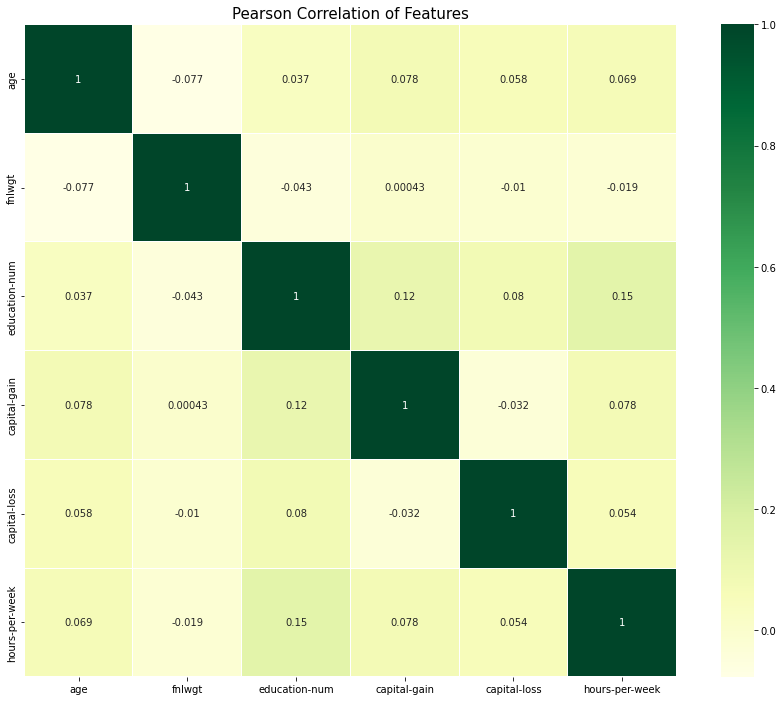

In [20]:
# Compute the correlation matrix
corr = data.corr()
f, ax = plt.subplots(figsize=(16, 12))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
_ = sns.heatmap(corr, cmap="YlGn", square=True, ax = ax, annot=True, linewidth = 0.1)
plt.title('Pearson Correlation of Features', y=1.05, size=15)

#### Cross tabulation

In [10]:
pd.crosstab(data['work-class'],data['sex'], margins=True)

sex,Female,Male,All
work-class,,,
Federal-gov,315,645,960
Local-gov,835,1258,2093
Never-worked,2,5,7
Private,7752,14944,22696
Self-emp-inc,135,981,1116
Self-emp-not-inc,399,2142,2541
State-gov,489,809,1298
Without-pay,5,9,14
All,9932,20793,30725


#### Box plot

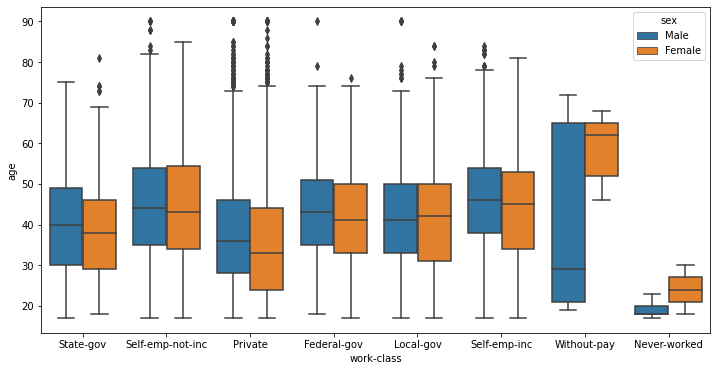

In [11]:
plt.figure(figsize=(12,6))
sns.boxplot(x="work-class",y="age", hue="sex", data=data)

#### Group table

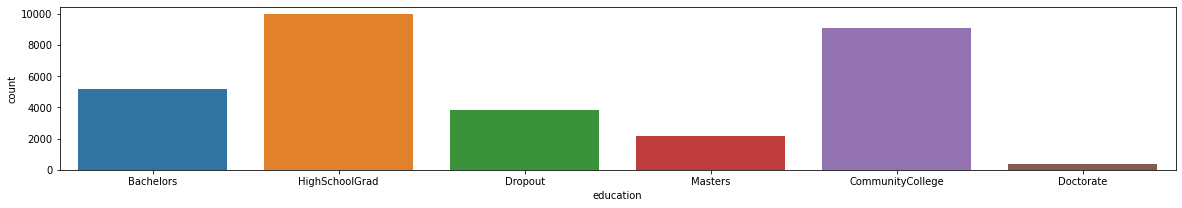

In [17]:
#Grouping education
data['education'].replace('Preschool', 'Dropout',inplace=True)
data['education'].replace('10th', 'Dropout',inplace=True)
data['education'].replace('11th', 'Dropout',inplace=True)
data['education'].replace('12th', 'Dropout',inplace=True)
data['education'].replace('1st-4th', 'Dropout',inplace=True)
data['education'].replace('5th-6th', 'Dropout',inplace=True)
data['education'].replace('7th-8th', 'Dropout',inplace=True)
data['education'].replace('9th', 'Dropout',inplace=True)
data['education'].replace('HS-Grad', 'HighSchoolGrad',inplace=True)
data['education'].replace('HS-grad', 'HighSchoolGrad',inplace=True)
data['education'].replace('Some-college', 'CommunityCollege',inplace=True)
data['education'].replace('Assoc-acdm', 'CommunityCollege',inplace=True)
data['education'].replace('Assoc-voc', 'CommunityCollege',inplace=True)
data['education'].replace('Prof-school', 'Masters',inplace=True)
fig = plt.figure(figsize=(20,3))
sns.countplot(x="education", data=data)

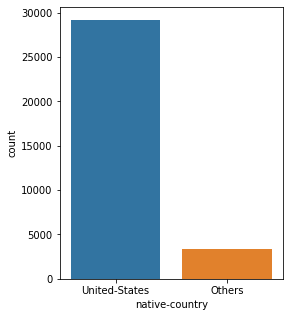

In [13]:
# Grouping native-country
data['native-country'] = data['native-country'].apply(lambda el: "United-States" if el == "United-States" else "Others")
# Plotting count plot for native-country
fig = plt.figure(figsize=(4,5))
sns.countplot(x="native-country", data=data)

#### Dropping the missing values

In [14]:
# Dropping missing values
data = data.dropna()
# Dropping duplicate values
data = data.drop_duplicates()
# Dropping outlier
i = data[data['capital-gain'] > 80000].index
data = data.drop(i)
# Dropping the column fnlwgt
data = data.drop(columns='fnlwgt')
# Combining capital-gain and capital-loss into 1 column
data['netcapitalgain'] = data.apply(lambda x: x['capital-gain'] + x['capital-loss'], axis=1)
data = data.drop(columns='capital-gain')
data = data.drop(columns='capital-loss')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30539 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30539 non-null  int64 
 1   work-class      30539 non-null  object
 2   education       30539 non-null  object
 3   education-num   30539 non-null  int64 
 4   marital-status  30539 non-null  object
 5   occupation      30539 non-null  object
 6   relationship    30539 non-null  object
 7   race            30539 non-null  object
 8   sex             30539 non-null  object
 9   hours-per-week  30539 non-null  int64 
 10  native-country  30539 non-null  object
 11  income          30539 non-null  object
 12  netcapitalgain  30539 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 3.3+ MB


In [15]:
data.describe()

,age,education-num,hours-per-week,netcapitalgain
count,30539.000000,30539.000000,30539.000000,30539.000000
mean,38.408330,10.117129,40.906578,694.408658
std,13.115064,2.553687,11.964492,2591.108501
min,17.000000,1.000000,1.000000,0.000000
25%,28.000000,9.000000,40.000000,0.000000
50%,37.000000,10.000000,40.000000,0.000000
75%,47.000000,13.000000,45.000000,0.000000
max,90.000000,16.000000,99.000000,41310.000000


Text(0.5, 1.05, 'Pearson Correlation of Features')

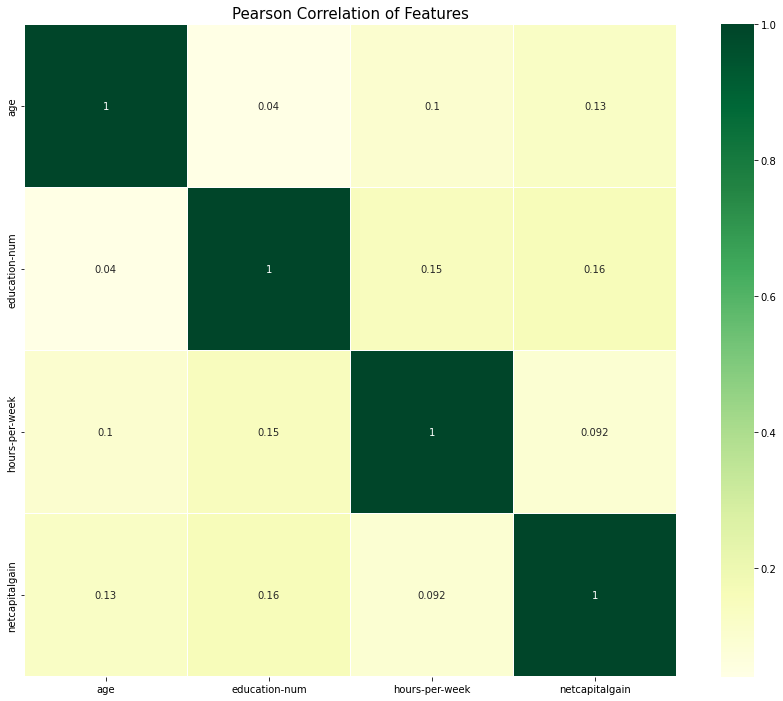

In [16]:
# Compute the correlation matrix
corr = data.corr()
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 12))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap
_ = sns.heatmap(corr, cmap="YlGn", square=True, ax = ax, annot=True, linewidth = 0.1)
plt.title('Pearson Correlation of Features', y=1.05, size=15)

#Data Analysis 

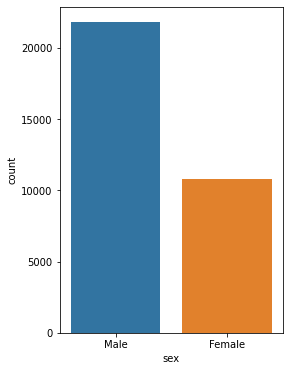

In [23]:
plt.figure(figsize=(4,6))
sns.countplot(data = categorical_attributes, x = "sex")

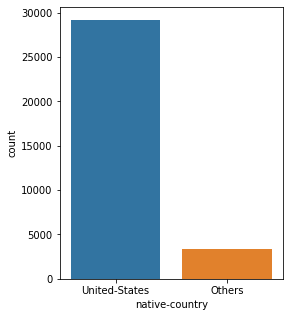

In [25]:
data['native-country'] = data['native-country'].apply(lambda el: "United-States" if el == "United-States" else "Others")
fig = plt.figure(figsize=(4,5))
sns.countplot(x="native-country", data=data)

In [27]:
pd.crosstab(data['native-country'],data['sex'], margins=True)

sex,Female,Male,All
native-country,,,
Others,1089,2302,3391
United-States,9682,19488,29170
All,10771,21790,32561


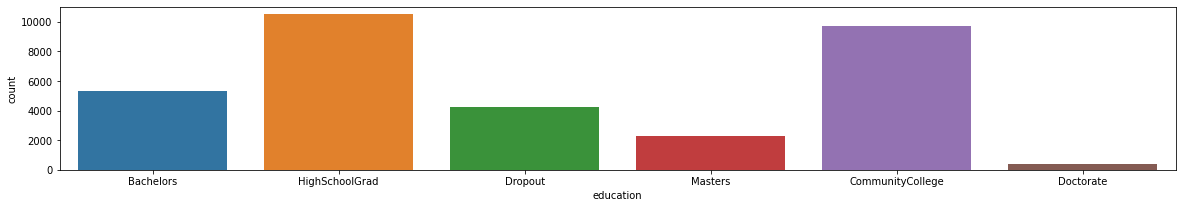

In [28]:
data['education'].replace('Preschool', 'Dropout',inplace=True)
data['education'].replace('10th', 'Dropout',inplace=True)
data['education'].replace('11th', 'Dropout',inplace=True)
data['education'].replace('12th', 'Dropout',inplace=True)
data['education'].replace('1st-4th', 'Dropout',inplace=True)
data['education'].replace('5th-6th', 'Dropout',inplace=True)
data['education'].replace('7th-8th', 'Dropout',inplace=True)
data['education'].replace('9th', 'Dropout',inplace=True)
data['education'].replace('HS-Grad', 'HighSchoolGrad',inplace=True)
data['education'].replace('HS-grad', 'HighSchoolGrad',inplace=True)
data['education'].replace('Some-college', 'CommunityCollege',inplace=True)
data['education'].replace('Assoc-acdm', 'CommunityCollege',inplace=True)
data['education'].replace('Assoc-voc', 'CommunityCollege',inplace=True)
data['education'].replace('Prof-school', 'Masters',inplace=True)

fig = plt.figure(figsize=(20,3))
sns.countplot(x="education", data=data)

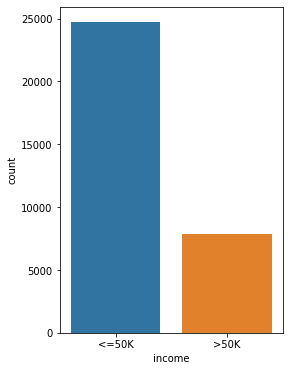

In [29]:
plt.figure(figsize=(4,6))
sns.countplot(data = categorical_attributes, x = "income")

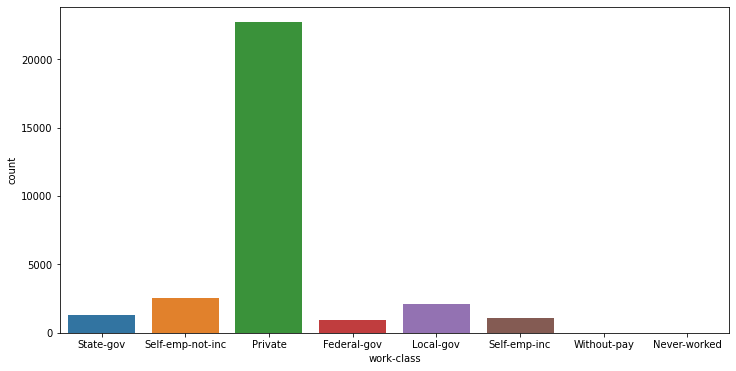

In [30]:
categorical_attributes = data.select_dtypes(include=['object'])
plt.figure(figsize=(12,6))
sns.countplot(data = categorical_attributes, x = "work-class")

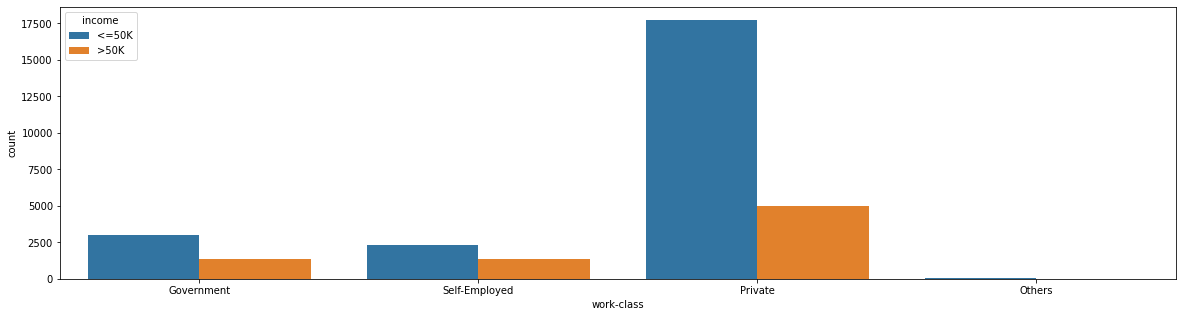

In [33]:
data['work-class'].replace('State-gov', 'Government',inplace=True)
data['work-class'].replace('Self-emp-not-inc', 'Self-Employed',inplace=True)
data['work-class'].replace('Private', 'Private',inplace=True)
data['work-class'].replace('Federal-gov', 'Government',inplace=True)
data['work-class'].replace('Local-gov', 'Government',inplace=True)
data['work-class'].replace('Self-emp-inc', 'Self-Employed',inplace=True)
data['work-class'].replace('Without-pay', 'Others',inplace=True)
data['work-class'].replace('Never-worked', 'Others',inplace=True)

# Plotting count plot for working-class and income
fig = plt.figure(figsize=(20,5))
sns.countplot(x="work-class", hue="income", data=data)

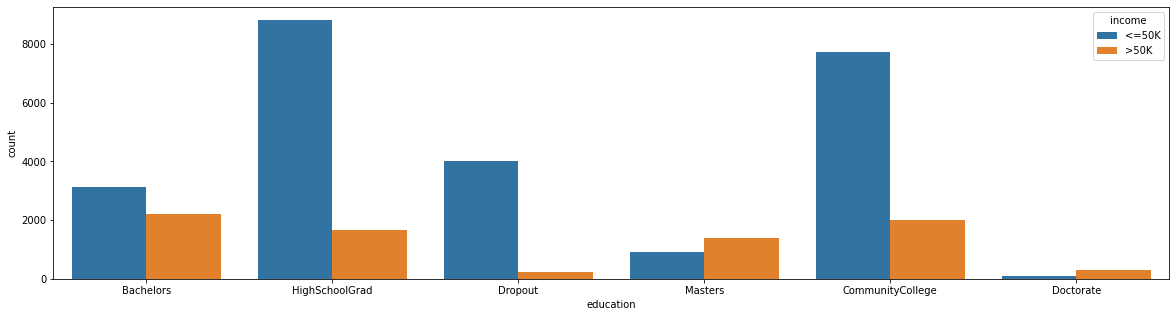

In [34]:
fig = plt.figure(figsize=(20,5))
sns.countplot(x="education", hue="income", data=data)

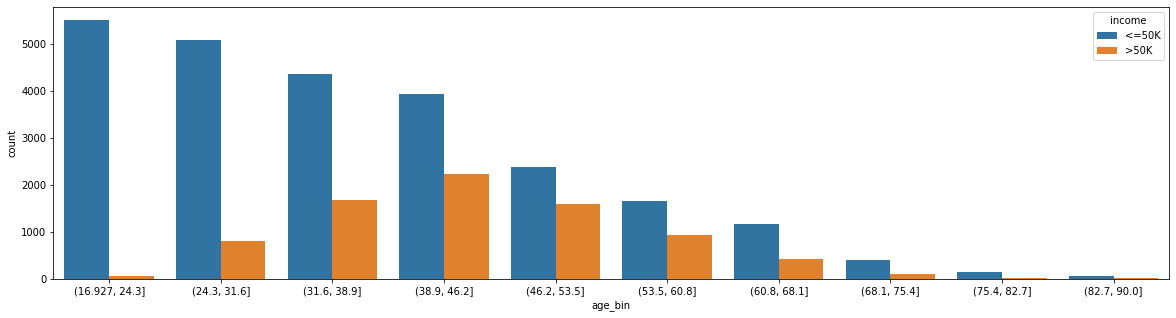

In [32]:
data['age_bin'] = pd.cut(data['age'], 10)
fig = plt.figure(figsize=(20,5))
sns.countplot(x="age_bin", hue="income", data=data)

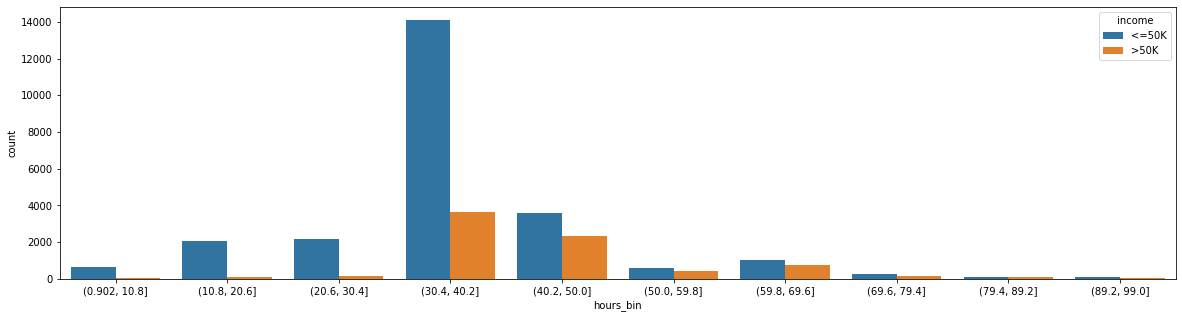

In [36]:
data['hours_bin'] = pd.cut(data['hours-per-week'], 10)
fig = plt.figure(figsize=(20,5))
sns.countplot(x="hours_bin", hue="income", data=data)

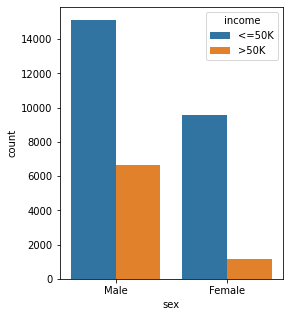

In [37]:
fig = plt.figure(figsize=(4,5))
sns.countplot(x="sex", hue="income", data=data)

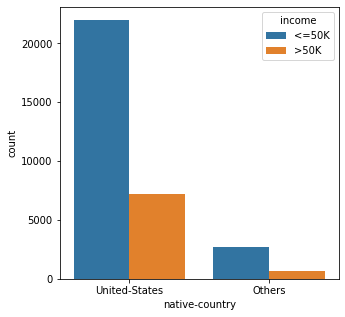

In [35]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x="native-country", hue="income", data=data)